In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import torchvision.transforms as transforms
#from torch.utils.data import DataLoader
#from models.data.datasets import ImgFlowOccFromFolder, MpiSintelClean, MpiSintelFinal
from models.data.utils.flow_utils import flow2img
from models.networks.lightning_datamodule import DatasetModule
from models.flow_model import FlowModel
import pytorch_lightning as pl

In [2]:
root1 = r'/home/tnguyen/dataset/mpi-sample2/training'
data_module = DatasetModule(root = root1, batch_size=32, dataset_name = 'MpiSintelClean')
data_module.prepare_data()
data_module.setup()
dataloader = data_module.train_dataloader()

In [3]:
iteration = iter(dataloader)

In [4]:
imgs, flow = next(iteration)

In [20]:
imgs.shape

torch.Size([16, 6, 384, 1024])

In [ ]:
find_best_lr = False

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
hparams = dict(network_type = 'flow', model='simple', epochs = 200, batch_size=32, learning_rate=2.089e-4)
model = FlowModel(hparams= hparams)

early_stop_callback = EarlyStopping(monitor='train_loss',min_delta=0.00,patience=50,verbose=False, mode='min')

if not find_best_lr: 
        trainer = pl.Trainer(max_epochs=200, gpus=1, callbacks=[early_stop_callback])
        trainer.fit(model, datamodule = data_module)
else: 
        trainer = pl.Trainer(gpus =1, max_epochs = 200)
        lr_finder = trainer.tuner.lr_find(model, datamodule = data_module, early_stop_threshold=None)
        suggested_lr = lr_finder.suggestion()
        print(suggested_lr)



In [5]:
model =FlowModel.load_from_checkpoint('/home/tnguyen/OCFlow/lightning_logs/simple, full size, ambush/checkpoints/epoch=374.ckpt')

In [7]:
predicted_flow = model(imgs)

In [ ]:
print(flow.shape)
print(predicted_flow.shape)

In [18]:
flow.shape

torch.Size([16, 2, 384, 1024])

In [23]:

flow_ = flow[9].detach().cpu().numpy().transpose(1, 2, 0)

predicted_flow_ = predicted_flow[9].detach().cpu().numpy().transpose(1, 2, 0)

predicted_flow_ = flow2img(predicted_flow_)
flow_ = flow2img(flow_)



Text(0.5, 1.0, 'after training')

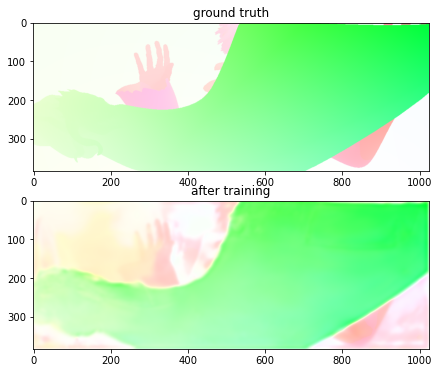

In [22]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(flow_)
plt.title('ground truth')



plt.subplot(2, 1, 2)
plt.imshow(predicted_flow_)
plt.title('after training')